# Projet 5 - Segmentez des clients d'un site de e-commerce

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%load_ext pycodestyle_magic

pd.options.display.max_columns = None

In [2]:
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geo = pd.read_csv('olist_geolocation_dataset.csv')
category = pd.read_csv('product_category_name_translation.csv')
print(f'Le fichier orders contient {orders.shape[0]} lignes et {orders.shape[1]} colonnes')
print(f'Le fichier customers contient {customers.shape[0]} lignes et {customers.shape[1]} colonnes')
print(f'Le fichier payments contient {payments.shape[0]} lignes et {payments.shape[1]} colonnes')
print(f'Le fichier reviews contient {reviews.shape[0]} lignes et {reviews.shape[1]} colonnes')
print(f'Le fichier items contient {items.shape[0]} lignes et {items.shape[1]} colonnes')
print(f'Le fichier products contient {products.shape[0]} lignes et {products.shape[1]} colonnes'.format())
print(f'Le fichier sellers contient {sellers.shape[0]} lignes et {sellers.shape[1]} colonnes'.format())
print(f'Le fichier geo contient {geo.shape[0]} lignes et {geo.shape[1]} colonnes'.format())
print(f'Le fichier category contient {category.shape[0]} lignes et {category.shape[1]} colonnes'.format())

Le fichier orders contient 99441 lignes et 8 colonnes
Le fichier customers contient 99441 lignes et 5 colonnes
Le fichier payments contient 103886 lignes et 5 colonnes
Le fichier reviews contient 99224 lignes et 7 colonnes
Le fichier items contient 112650 lignes et 7 colonnes
Le fichier products contient 32951 lignes et 9 colonnes
Le fichier sellers contient 3095 lignes et 4 colonnes
Le fichier geo contient 1000163 lignes et 5 colonnes
Le fichier category contient 71 lignes et 2 colonnes


In [3]:
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Les dates d'achat / Les heures d'achat


In [4]:
print(customers.info())
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
print(customers.customer_id.nunique())
print(customers.customer_unique_id.nunique())

99441
96096


Les villes de résidences/Zipcode des customers.  
On constate également qu'un customer_unique_id existe. Naturellement, il y a moins de valeurs uniques dans cette feature. Cela peut-être interprété commes les customers ayant déménager et changé d'état.

In [6]:
print(payments.info())
payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Type de paiements/paiement en plusieurs fois / valeur de l'achat

In [7]:
print(reviews.info())
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Score de satisfaction

In [8]:
print(items.info())
items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Liste des produits avec leurs vendeurs / leurs prix et leur poids

In [9]:
print(products.info())
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Liste des produits avec leurs caractéristiques

In [10]:
print(sellers.info())
sellers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Liste des vendeurs avec leurs localisations en terme d'état/de zipcode et de ville

In [11]:
print(geo.info())
geo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Données de géolocalisation des zipcodes

In [12]:
print(category.info())
category.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Regroupement dans un Dataframe unique

In [13]:
# Fusion sur les seules clés possibles
data = pd.merge(orders, customers, on='customer_id')
data = data.merge(payments, on='order_id')
data = data.merge(reviews, on='order_id')
data = data.merge(items, on='order_id')
data = data.merge(products, on='product_id')
data = data.merge(sellers, on='seller_id')
data = data.merge(category, on='product_category_name')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   customer_unique_id             115609 non-null  object 
 9   customer_zip_code_prefix       115609 non-null  int64  
 10  customer_city                  115609 non-null  object 
 11  customer_state                 115609 non-null  object 
 12  payment_sequential            

### Traitement des NA

In [14]:
def traitement_NA(df):
    '''
    Fonction permettant de sortir un tableau classé de l'ensemble des features comportant des NA, par nombre et %
    ----------
    Paramètre:
    - df : dataframe
    ----------
    Return:
    - une visualisation d'un tableau avec la liste des features et leurs taux de remplissage
    ----------
    - Amélioration à faire : forcer à classer par type en plus
    '''
    df_NA = pd.concat([df.isna().sum().sort_values(ascending=False),
                       ((df.isna().sum()/data.isna().count())*100).sort_values(ascending=False),
                       df.dtypes], axis=1, keys=['Total_NA', '%_de_NA', 'Type'])

    display(df_NA[df_NA['Total_NA'] > 0])

In [15]:
traitement_NA(data)

,Total_NA,%_de_NA,Type
review_comment_title,101808,88.062348,object
review_comment_message,66703,57.697065,object
order_delivered_customer_date,2400,2.075963,object
order_delivered_carrier_date,1195,1.033657,object
order_approved_at,14,0.012110,object
product_weight_g,1,0.000865,float64
product_width_cm,1,0.000865,float64
product_height_cm,1,0.000865,float64
product_length_cm,1,0.000865,float64


In [16]:
# Visualisation du remplissage des features
# msno.bar(data.sample(len(data)))

De part la compréhension métier :   
    - **order_approved_at** est identique à order_purchase_timestamp  
    - **order_delivered_carrier_date** ne devrait pas nous servir pour l'étude  

Les valeurs manquantes sur '**order_delivered_customer_date**' posent problème pour le calcul du retard de livraison. Pour ne pas trop pénaliser cet indicateur, remplacement des NA par la date prévisionnelle de livraison : 'order_estimated_delivery_date'.  
    
Les **titres et commentaires des reviews** vides seront respectivement remplacés par 'Missing_title' et 'Missing_message'  

Les **caractéristiques** manquantes sont sur la même commande. Suppression de cette commande.  

In [17]:
# Remplacement des N/A
data['order_approved_at'].fillna(data['order_purchase_timestamp'], inplace=True)
data['order_delivered_customer_date'].fillna(data['order_estimated_delivery_date'], inplace=True)
data['review_comment_title'].fillna('Missing_title', inplace=True)
data['review_comment_message'].fillna('Missing_message', inplace=True)

data.drop(['order_delivered_carrier_date'], axis=1, inplace=True)
data.drop(data[data['product_height_cm'].isna()].index, inplace=True)

data.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght 

### Traitement des types

In [18]:
liste_date = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date',
              'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

for date in liste_date:
    data[date] = data[date].astype('datetime64[ns]')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115608 entries, 0 to 115608
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115608 non-null  object        
 1   customer_id                    115608 non-null  object        
 2   order_status                   115608 non-null  object        
 3   order_purchase_timestamp       115608 non-null  datetime64[ns]
 4   order_approved_at              115608 non-null  datetime64[ns]
 5   order_delivered_customer_date  115608 non-null  datetime64[ns]
 6   order_estimated_delivery_date  115608 non-null  datetime64[ns]
 7   customer_unique_id             115608 non-null  object        
 8   customer_zip_code_prefix       115608 non-null  int64         
 9   customer_city                  115608 non-null  object        
 10  customer_state                 115608 non-null  object        
 11  

### Traitement des doublons  

In [19]:
data.duplicated().sum()

0

## Analyse exploratoire

### Review

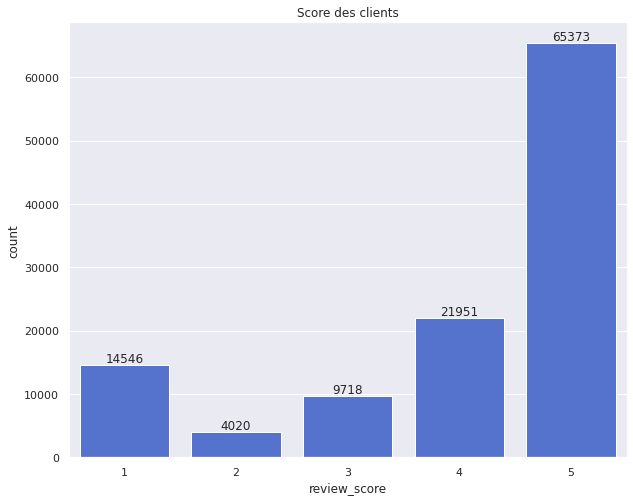

In [20]:
sns.set()
plt.rcParams["figure.figsize"] = (10, 8)
ax = sns.countplot(x='review_score', data=data, color='royalblue')
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Score des clients')

In [21]:
data_review_cat = data.groupby('product_category_name').mean()['review_score'].reset_index()
data_review_cat = data_review_cat.sort_values(by='review_score', ascending=False)

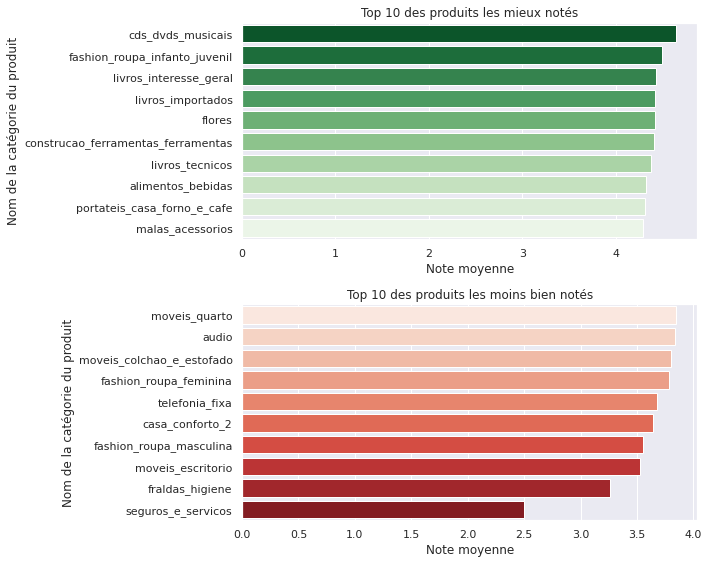

In [22]:
sns.set(font_scale=1)
fig, axes = plt.subplots(2)
plt.rcParams["figure.figsize"] = (12, 10)
sns.barplot(data=data_review_cat.head(10), x=data_review_cat['review_score'].head(10), y=data_review_cat['product_category_name'].head(10),
            ax=axes[0], palette='Greens_r')
sns.barplot(data=data_review_cat.tail(10), x=data_review_cat['review_score'].tail(10), y=data_review_cat['product_category_name'].tail(10),
            ax=axes[1], palette='Reds')
axes[0].set_title('Top 10 des produits les mieux notés')
axes[1].set_title('Top 10 des produits les moins bien notés')

for i in range(2):
    axes[i].set_xlabel('Note moyenne')
    axes[i].set_ylabel('Nom de la catégorie du produit')

fig.tight_layout()

### Localisation

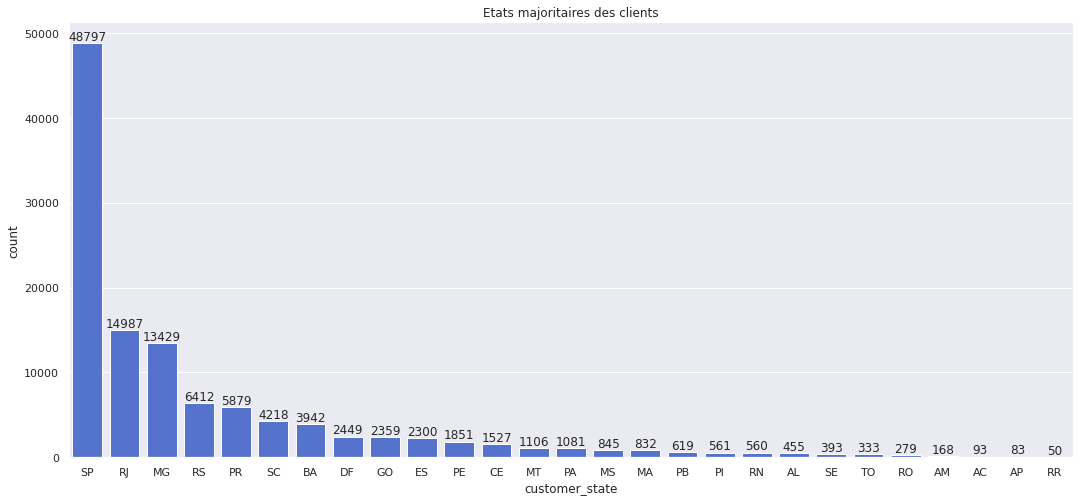

In [23]:
sns.set()
plt.rcParams["figure.figsize"] = (18, 8)
ax = sns.countplot(x='customer_state', color='royalblue', data=data, order=data['customer_state'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)

_ = ax.set_title('Etats majoritaires des clients')

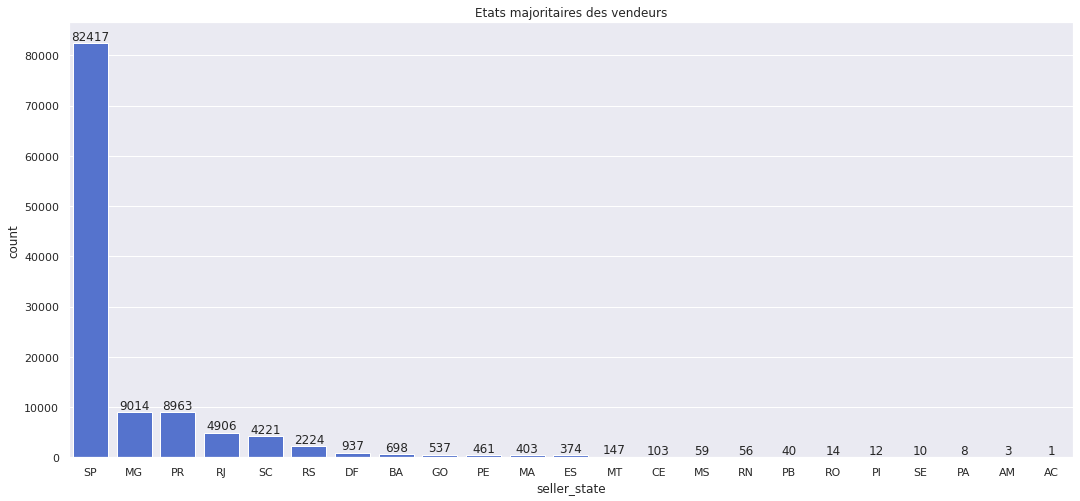

In [24]:
sns.set()
plt.rcParams["figure.figsize"] = (18, 8)

ax = sns.countplot(x='seller_state', color='royalblue', data=data, order=data['seller_state'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)
    
_ = ax.set_title('Etats majoritaires des vendeurs')

### Etat des ventes

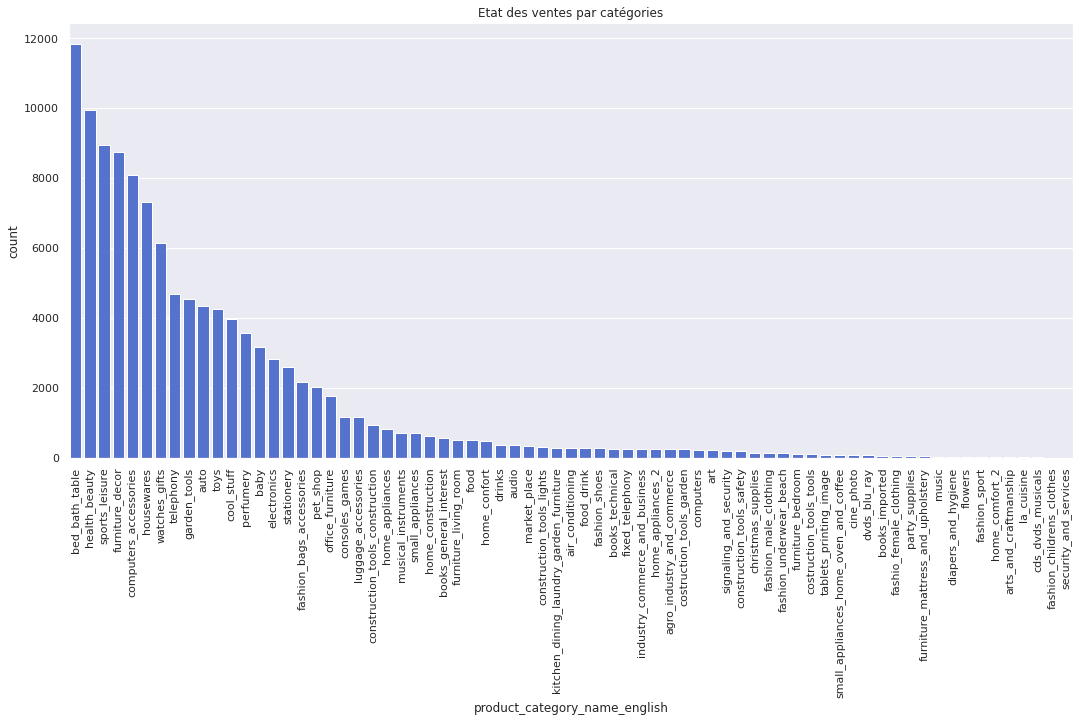

In [25]:
sns.set()

plt.rcParams["figure.figsize"] = (18, 8)

ax = sns.countplot(x='product_category_name_english', data=data, color='royalblue', order=data['product_category_name_english'].value_counts().index)

_ = ax.set_title('Etat des ventes par catégories')
_ = plt.xticks(rotation=90)

### Les paiements

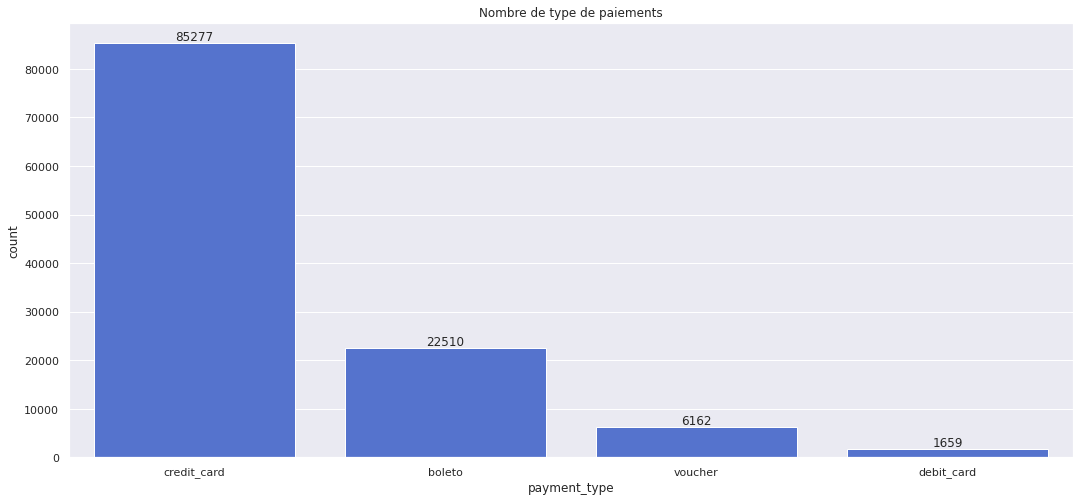

In [26]:
# Type de paiements
sns.set()
ax = sns.countplot(x='payment_type', data=data, color='royalblue', order=data['payment_type'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)
    
_ = ax.set_title('Nombre de type de paiements')

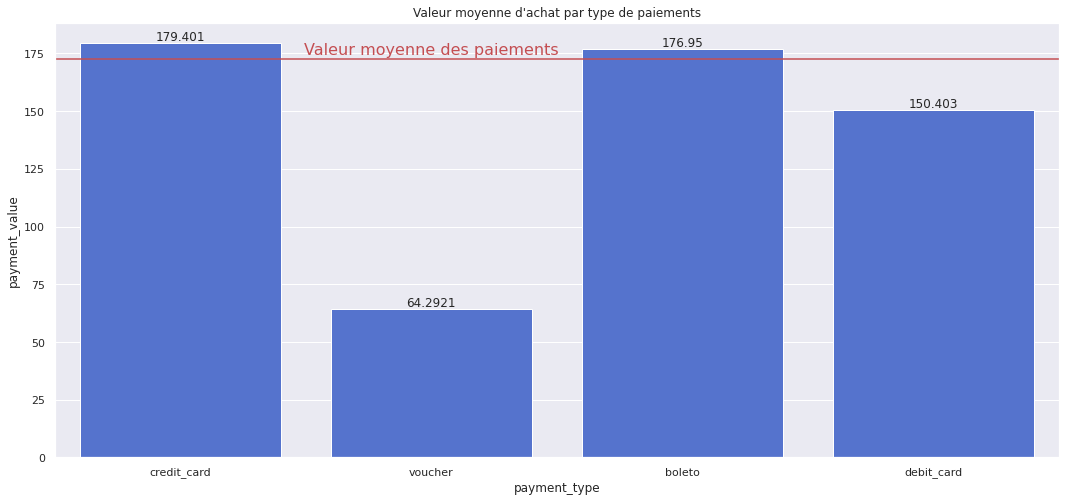

In [27]:
# Type de paiements
sns.set()

ax = sns.barplot(x='payment_type', y='payment_value', data=data, color='royalblue', ci=None)
plt.axhline(y=data.payment_value.mean(), color='r')

for container in ax.containers:
    ax.bar_label(container)
    
_ = ax.set_title('Valeur moyenne d\'achat par type de paiements')
_ = ax.annotate('Valeur moyenne des paiements', xy=(1, 0), xycoords='axes fraction', fontsize=16,
                xytext=(-500, 400), textcoords='offset points', color='r',
                ha='right', va='bottom')

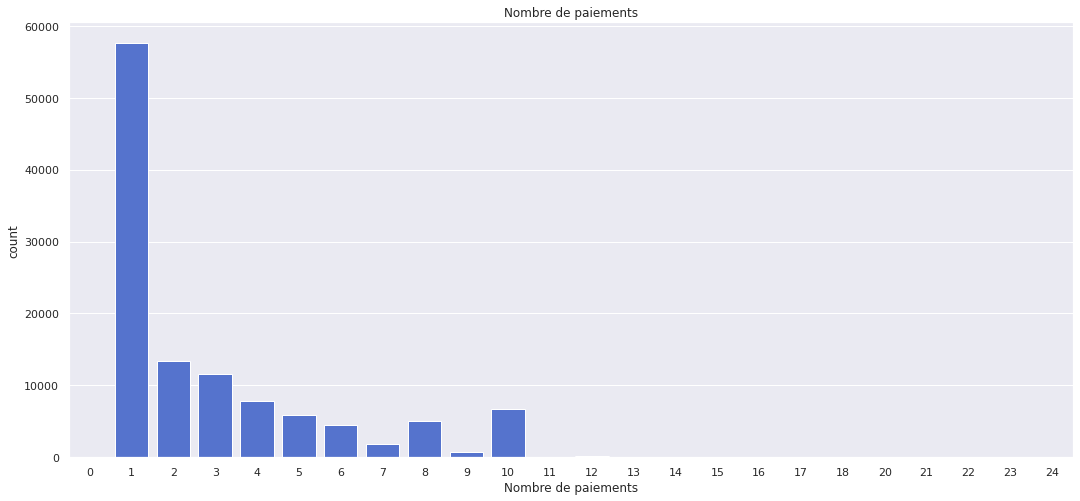

In [28]:
# Nombre de paiement par commande
sns.set()
ax = sns.countplot(x='payment_installments', data=data, color='royalblue')
_ = ax.set_title('Nombre de paiements')
_ = ax.set_xlabel('Nombre de paiements')

In [29]:
# Visualisation des paiements en '0' fois
data[data['payment_installments']==0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
3094,1a57108394169c0b47d8f876acc9ba2d,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-24 15:45:41,2018-06-06,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,2,credit_card,0,129.94,bc5dca6c957c328b1cbff760b0841fd2,5,Missing_title,Missing_message,2018-05-25,2018-05-26 00:24:28,1,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28,utilidades_domesticas,56.0,235.0,1.0,500.0,23.0,11.0,23.0,31573,belo horizonte,MG,housewares
3095,1a57108394169c0b47d8f876acc9ba2d,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-24 15:45:41,2018-06-06,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,2,credit_card,0,129.94,bc5dca6c957c328b1cbff760b0841fd2,5,Missing_title,Missing_message,2018-05-25,2018-05-26 00:24:28,2,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28,utilidades_domesticas,56.0,235.0,1.0,500.0,23.0,11.0,23.0,31573,belo horizonte,MG,housewares
78760,744bade1fcf9ff3f31d860ace076d422,5e5794daaa13f73e2f1cdb4114529843,delivered,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-27 20:55:28,2018-05-16,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,2,credit_card,0,58.69,c56b4b7042f417e70d3dc5340deb23fe,5,Missing_title,Missing_message,2018-04-28,2018-04-29 17:43:50,1,0cf573090c66bb30ac5e53c82bdb0403,7202e2ba20579a9bd1acb29e61fe71f6,2018-04-26 12:31:06,45.90,12.79,telefonia,26.0,108.0,1.0,128.0,15.0,8.0,13.0,14401,franca,SP,telephony


Remplacement des observations avec 0 paiement par 1 paiement

In [30]:
# Remplacement des paiement en '0' fois
data.loc[data['payment_installments'] == 0, 'payment_installments'] = 1

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


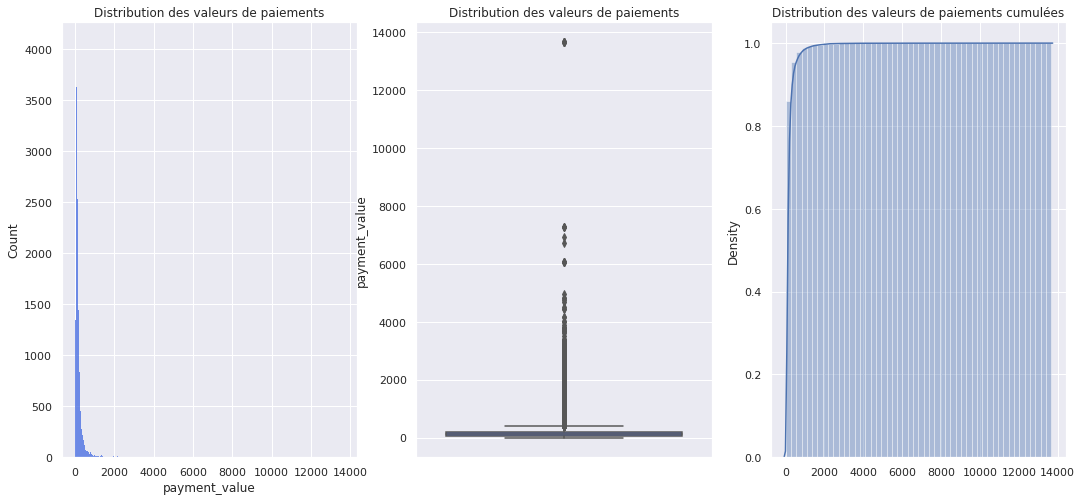

In [31]:
# Valeurs de paiements
sns.set()
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (35, 10)
kwargs = {'cumulative': True}

sns.histplot(x='payment_value', data=data, color='royalblue', ax=axes[0])
sns.boxplot(y=data['payment_value'], data=data, color='royalblue', ax=axes[1])
sns.distplot(x=data['payment_value'], hist_kws=kwargs, kde_kws=kwargs, ax=axes[2])


_ = axes[0].set_title('Distribution des valeurs de paiements')
_ = axes[1].set_title('Distribution des valeurs de paiements')
_ = axes[2].set_title('Distribution des valeurs de paiements cumulées')

# ax.set_xlim(left=0,right=2000)

La majeure partie des paiements sont inférieurs à 1000 réals bréziliens. On observe également une commande bien au dessus des autres.  

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


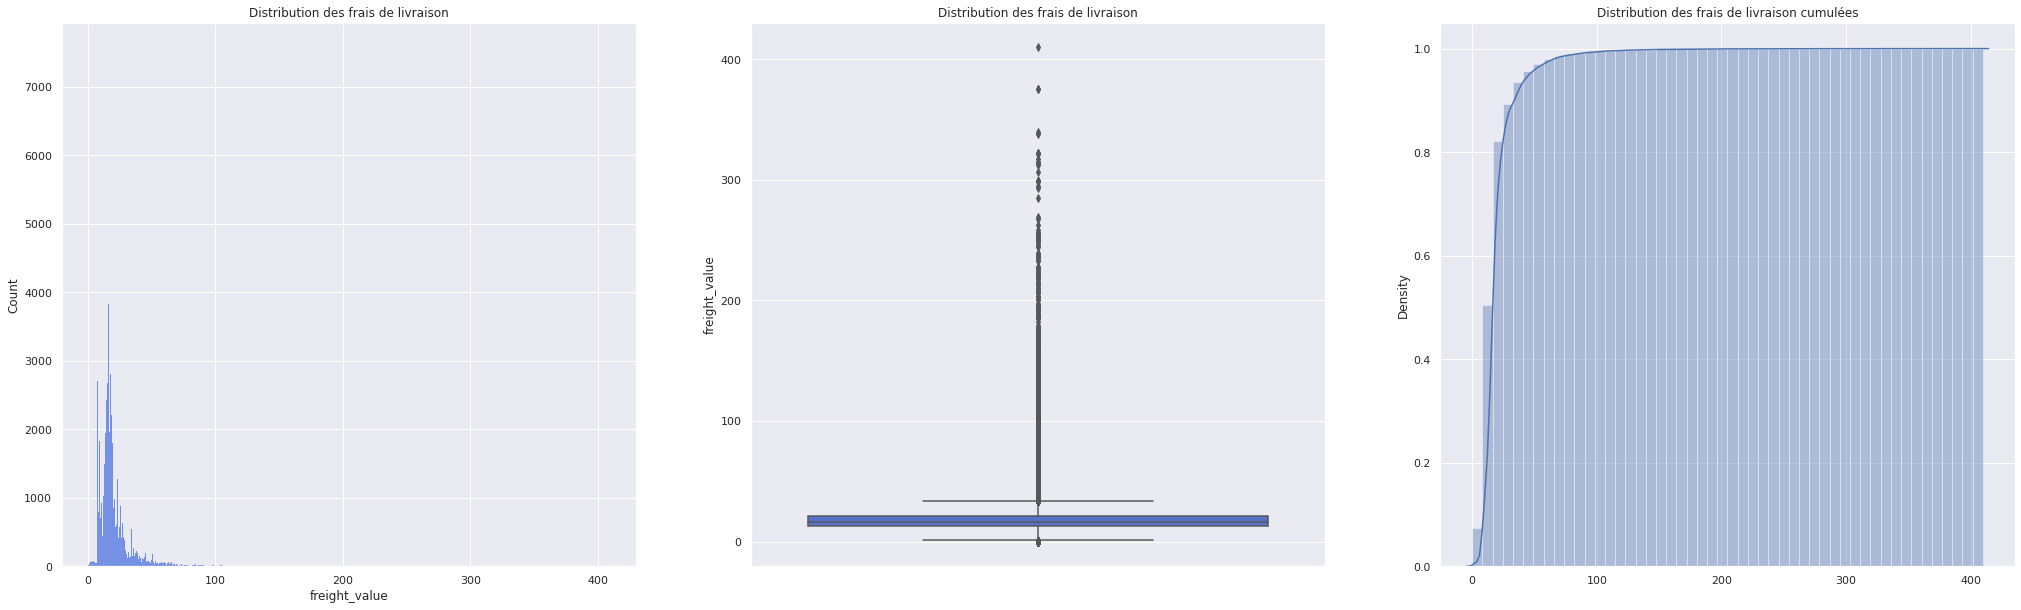

In [32]:
# Prix des colis
sns.set()
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (30, 10)
kwargs = {'cumulative': True}

sns.histplot(x='freight_value', data=data, color='royalblue', ax=axes[0])
sns.boxplot(y=data['freight_value'], data=data, color='royalblue', ax=axes[1])
sns.distplot(x=data['freight_value'], hist_kws=kwargs, kde_kws=kwargs, ax=axes[2])


_ = axes[0].set_title('Distribution des frais de livraison')
_ = axes[1].set_title('Distribution des frais de livraison')
_ = axes[2].set_title('Distribution des frais de livraison cumulées')

La plupart des livraisons sont inférieures à 20€

### Les commandes

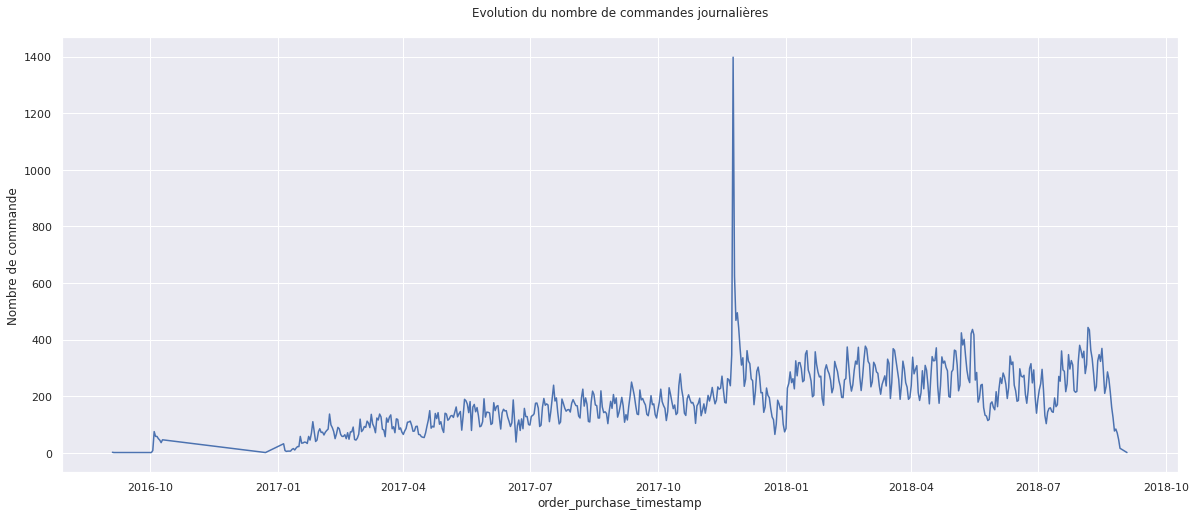

In [33]:
# Par jour
commandes_par_jour = data.groupby(data["order_purchase_timestamp"].dt.date).count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = commandes_par_jour.plot()
ax.set_ylabel("Nombre de commande")
plt.title("Evolution du nombre de commandes journalières\n")
plt.show()

In [34]:
# Calcul du jour où il y a eu le plus de commandes
commandes_par_jour.index[np.argmax(commandes_par_jour)]

datetime.date(2017, 11, 24)

Il s'agit du Black Friday

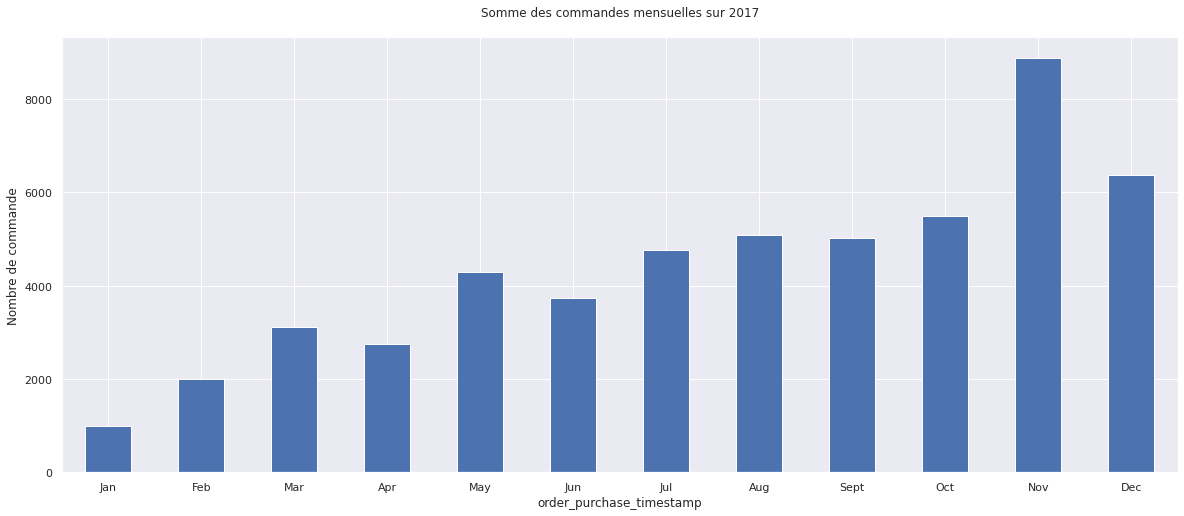

In [35]:
# Par mois
# Afin d'avoir une année complète, seules les données de 2017 seront prises

data_2017 = data[data['order_purchase_timestamp'].dt.year == 2017]
commandes_par_mois = data_2017.groupby(data["order_purchase_timestamp"].dt.month).count()["order_id"]

sns.set()
fig = plt.figure(figsize=(20, 8))
ax = commandes_par_mois.plot(kind='bar')

_ = ax.set_ylabel("Nombre de commande")
_ = plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                  'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
               rotation='horizontal')

_ = plt.title("Somme des commandes mensuelles sur 2017\n")

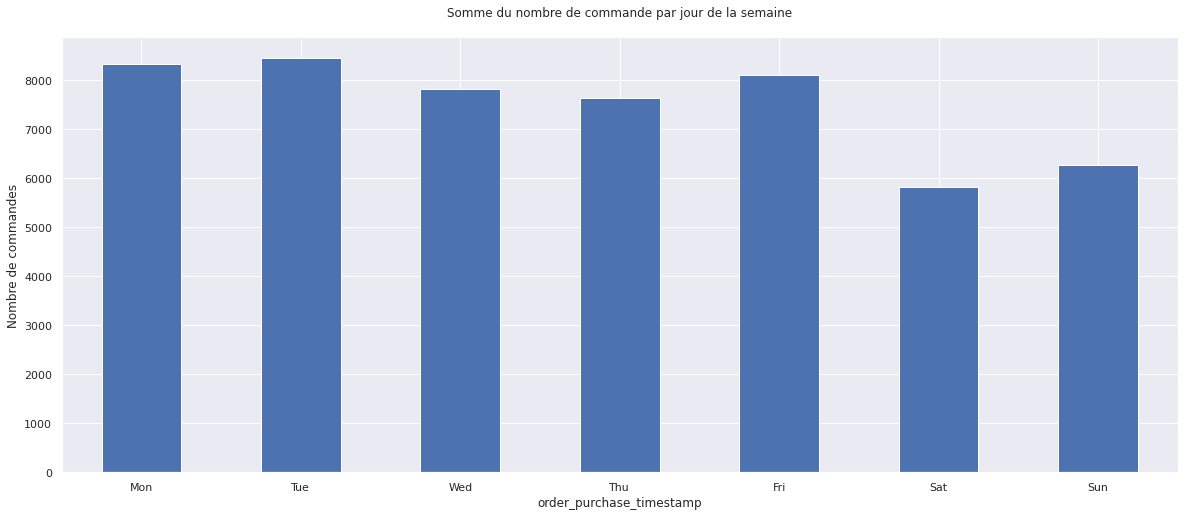

In [36]:
# Par jour de la semaine
commandes_par_jour_semaine = data_2017.groupby(data["order_purchase_timestamp"].dt.dayofweek).count()["order_id"]

sns.set()
fig = plt.figure(figsize=(20, 8))
ax = commandes_par_jour_semaine.plot(kind='bar')

_ = ax.set_ylabel("Nombre de commandes")
_ = plt.xticks(np.arange(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation='horizontal')
_ = plt.title("Somme du nombre de commande par jour de la semaine\n")

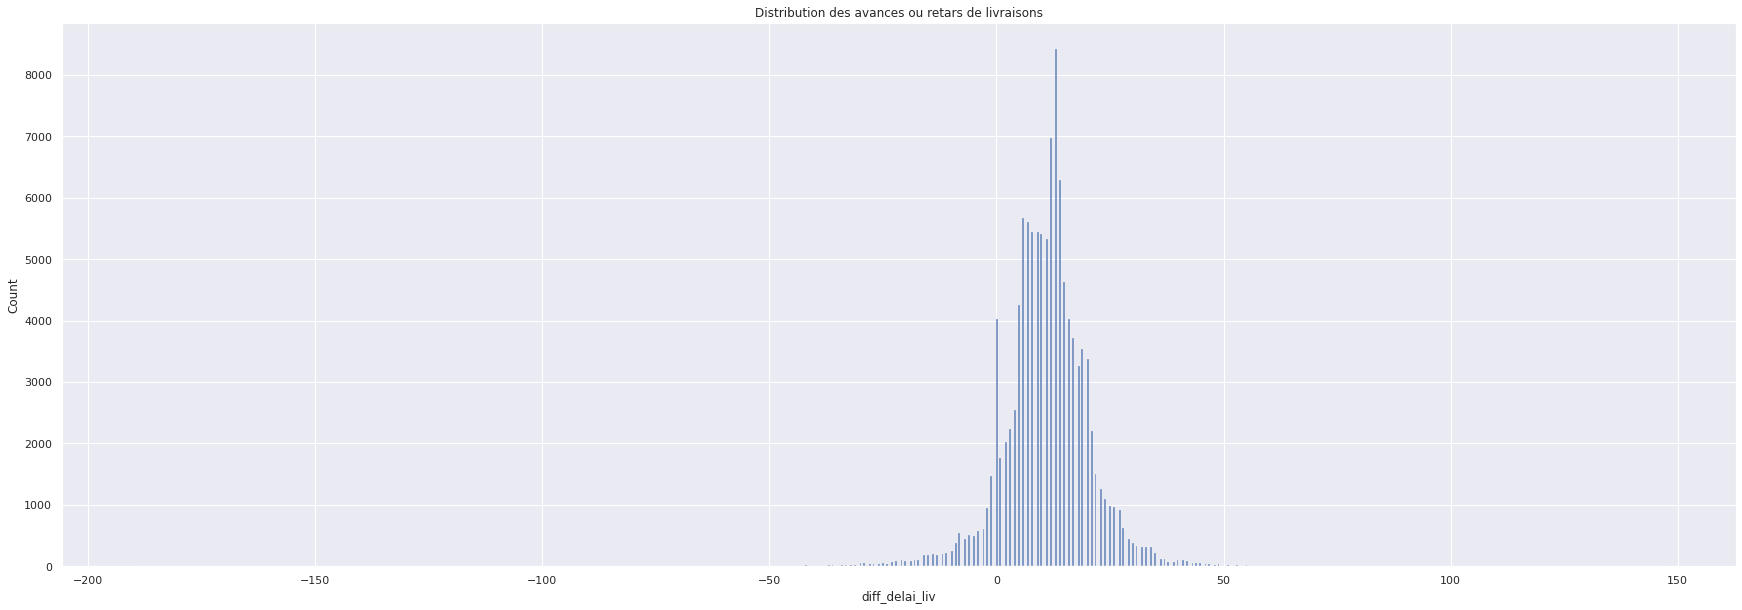

In [37]:
# Délais de livraisons
data['diff_delai_liv'] = (data['order_estimated_delivery_date'] - data['order_delivered_customer_date']).dt.days

sns.set()
ax = sns.histplot(x='diff_delai_liv', data=data)
_ = ax.set_title('Distribution des avances ou retars de livraisons')

In [38]:
# Equivalent à ce qui est en dessous
data.groupby(data['diff_delai_liv'] < 0).size()

diff_delai_liv
False    106893
True       8715
dtype: int64

In [39]:
delai_avance = 100*data[data['diff_delai_liv'] < 0].shape[0]/data.shape[0]
delai_retard = 100*data[data['diff_delai_liv'] > 0].shape[0]/data.shape[0]

In [40]:
print(f"{round(delai_avance,2)} % de commandes arrivent en avance et {round(delai_retard,2)}% arrivent en retard.")

7.54 % de commandes arrivent en avance et 88.97% arrivent en retard.


Le reste des commandes arrivent à l'heure. Il s'agit des NA imputés.

In [41]:
data['diff_delai_liv'].describe()

count    115608.000000
mean         10.861930
std          10.109911
min        -189.000000
25%           6.000000
50%          11.000000
75%          16.000000
max         146.000000
Name: diff_delai_liv, dtype: float64

En moyenne, les commandes sont livrées 11j après la date estimée.

## Export des données

In [42]:
data.to_csv("data_nettoyee.csv", index=False)